# Data Collection:


In [53]:

pip install ta


In [54]:
import pandas as pd
from ta.trend import ADXIndicator

In [55]:
import yfinance as yf

# Download Nifty50 data
nifty_data = yf.download('^NSEI', start='2010-01-01', end='2023-07-31')


[*********************100%***********************]  1 of 1 completed


In [56]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2023-07-24,19748.449219,19782.750000,19658.300781,19672.349609,19672.349609,265600
2023-07-25,19729.349609,19729.349609,19615.949219,19680.599609,19680.599609,369700
2023-07-26,19733.349609,19825.599609,19716.699219,19778.300781,19778.300781,244700


# Feature Engineering:

In [57]:
# Perform feature engineering to add technical indicators to the dataset
# (You may need to import appropriate libraries and implement the calculations)
nifty_data['SMA_10'] = nifty_data['Close'].rolling(window=10).mean()
nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean()
nifty_data['SMA_100'] = nifty_data['Close'].rolling(window=100).mean()
nifty_data['SMA_200'] = nifty_data['Close'].rolling(window=200).mean()
# Add more technical indicators as needed
#rolling(window=50): This part creates a rolling window of size 50 days. It means that for each row in the DataFrame, it looks back at the 50 previous rows (trading days) to calculate the SMA.

In [58]:
# Get the 26-day EMA of the closing price
k = nifty_data['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
d = nifty_data['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s

In [59]:

# Add all of our new values for the MACD to the dataframe
nifty_data['macd'] = nifty_data.index.map(macd)
nifty_data['macd_h'] = nifty_data.index.map(macd_h)
nifty_data['macd_s'] = nifty_data.index.map(macd_s)

In [60]:
# Assuming you have loaded historical price data into the 'data' DataFrame
adx_indicator = ADXIndicator(nifty_data['High'], nifty_data['Low'], nifty_data['Close'], window=14, fillna=True)
nifty_data['ADX'] = adx_indicator.adx()


D:\Anaconda\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
D:\Anaconda\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [61]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_50,SMA_100,SMA_200,macd,macd_h,macd_s,ADX
Date,,,,,,,,,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,19748.449219,19782.750000,19658.300781,19672.349609,19672.349609,265600,19649.230078,18895.704063,18237.872598,18117.466777,273.673010,7.441134,266.231876,50.189624
2023-07-25,19729.349609,19729.349609,19615.949219,19680.599609,19680.599609,369700,19673.350000,18921.339062,18260.020586,18131.433027,259.151213,-5.664530,264.815743,49.917040
2023-07-26,19733.349609,19825.599609,19716.699219,19778.300781,19778.300781,244700,19712.750000,18951.175078,18283.876602,18143.953027,252.614272,-9.761177,262.375449,50.034987


# Prepare the Data:

In [62]:
# Drop rows with missing values
nifty_data.dropna(inplace=True)

In [63]:
# Define the target variable 'y' based on the desired prediction horizon
nifty_data['Target'] = nifty_data['Close'].shift(-1)


In [64]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_50,SMA_100,SMA_200,macd,macd_h,macd_s,ADX,Target
Date,,,,,,,,,,,,,,,
2010-10-19,6114.450195,6127.049805,6008.149902,6027.299805,6027.299805,0,6121.410010,5781.032012,5538.086011,5322.798259,87.154557,-28.899917,116.054474,40.913236,5982.100098
2010-10-20,6002.950195,6038.100098,5966.750000,5982.100098,5982.100098,0,6100.975000,5791.460010,5548.205010,5326.547759,72.058794,-35.196544,107.255338,38.356342,6101.500000
2010-10-21,6008.899902,6113.500000,5984.899902,6101.500000,6101.500000,0,6099.095020,5805.078008,5559.021509,5330.665759,68.935225,-30.656091,99.591315,36.737987,6066.049805
2010-10-22,6113.399902,6121.100098,6041.350098,6066.049805,6066.049805,0,6095.354980,5818.070000,5568.577007,5334.587009,62.874461,-29.373483,92.247944,35.307260,6105.799805
2010-10-25,6101.250000,6151.299805,6094.600098,6105.799805,6105.799805,0,6092.349951,5831.143994,5578.280005,5338.800508,60.580422,-25.334018,85.914440,34.268445,6082.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,19748.449219,19782.750000,19658.300781,19672.349609,19672.349609,265600,19649.230078,18895.704063,18237.872598,18117.466777,273.673010,7.441134,266.231876,50.189624,19680.599609
2023-07-25,19729.349609,19729.349609,19615.949219,19680.599609,19680.599609,369700,19673.350000,18921.339062,18260.020586,18131.433027,259.151213,-5.664530,264.815743,49.917040,19778.300781
2023-07-26,19733.349609,19825.599609,19716.699219,19778.300781,19778.300781,244700,19712.750000,18951.175078,18283.876602,18143.953027,252.614272,-9.761177,262.375449,50.034987,19659.900391


In [65]:
nifty_data.dropna(inplace=True)



User
nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean() What it means?
ChatGPT
The code nifty_data['SMA_50'] = nifty_data['Close'].rolling(window=50).mean() calculates the 50-day Simple Moving Average (SMA) of the Nifty 50 index's closing prices and adds it as a new column called 'SMA_50' to the nifty_data DataFrame.

Here's a breakdown of what each part of the code does:


nifty_data['Target']: This assigns the shifted 'Close' values to a new column called 'Target' in the nifty_data DataFrame. The 'Target' column will now contain the closing prices of the Nifty 50 index for the next trading day for each row.
By doing this, you've essentially aligned the current closing price with the past closing price of the next trading day, not the future closing price.

This kind of data preparation is often used in time series forecasting tasks, where you want to predict a future value based on past data. In this case, 'Target' contains the actual closing prices of the Nifty 50 index for the next trading day, which can be used as the target variable for training a time series forecasting model.







In [66]:
# Define features 'X' and target variable 'y'
X = nifty_data[['SMA_10','SMA_50','SMA_100', 'SMA_200','macd', 'macd_h','macd_s','ADX']]  # Include other technical indicators as needed
y = nifty_data['Target']

# Split Data into Training and Testing Sets:

In [67]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' and 'X_test' are your training and test datasets
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)


In [69]:
nifty_data

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_50,SMA_100,SMA_200,macd,macd_h,macd_s,ADX,Target
Date,,,,,,,,,,,,,,,
2010-10-19,6114.450195,6127.049805,6008.149902,6027.299805,6027.299805,0,6121.410010,5781.032012,5538.086011,5322.798259,87.154557,-28.899917,116.054474,40.913236,5982.100098
2010-10-20,6002.950195,6038.100098,5966.750000,5982.100098,5982.100098,0,6100.975000,5791.460010,5548.205010,5326.547759,72.058794,-35.196544,107.255338,38.356342,6101.500000
2010-10-21,6008.899902,6113.500000,5984.899902,6101.500000,6101.500000,0,6099.095020,5805.078008,5559.021509,5330.665759,68.935225,-30.656091,99.591315,36.737987,6066.049805
2010-10-22,6113.399902,6121.100098,6041.350098,6066.049805,6066.049805,0,6095.354980,5818.070000,5568.577007,5334.587009,62.874461,-29.373483,92.247944,35.307260,6105.799805
2010-10-25,6101.250000,6151.299805,6094.600098,6105.799805,6105.799805,0,6092.349951,5831.143994,5578.280005,5338.800508,60.580422,-25.334018,85.914440,34.268445,6082.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-21,19800.449219,19887.400391,19700.000000,19745.000000,19745.000000,312500,19617.585156,18868.553086,18216.261602,18104.576777,289.067405,24.695813,264.371592,49.967106,19672.349609
2023-07-24,19748.449219,19782.750000,19658.300781,19672.349609,19672.349609,265600,19649.230078,18895.704063,18237.872598,18117.466777,273.673010,7.441134,266.231876,50.189624,19680.599609
2023-07-25,19729.349609,19729.349609,19615.949219,19680.599609,19680.599609,369700,19673.350000,18921.339062,18260.020586,18131.433027,259.151213,-5.664530,264.815743,49.917040,19778.300781


In [70]:
X_train

,SMA_10,SMA_50,SMA_100,SMA_200,macd,macd_h,macd_s,ADX
Date,,,,,,,,
2022-04-27,17203.250195,17106.277070,17285.509492,17212.254487,-30.924628,-72.393654,41.469026,16.060112
2016-10-19,8664.320020,8704.110020,8510.322026,8042.495005,-27.264925,-11.875051,-15.389873,15.344255
2021-10-29,18158.905078,17565.313984,16732.875986,15773.080483,130.955050,-79.473410,210.428460,32.093112
2022-02-03,17427.019727,17438.750859,17647.041934,16699.344458,-26.314651,-33.087602,6.772951,21.859695
2014-01-13,6216.825049,6191.272002,6001.602017,5919.104749,4.373496,-8.204755,12.578251,11.479535
...,...,...,...,...,...,...,...,...
2023-06-02,18455.705078,17890.124102,17802.522520,17850.606260,168.941584,-1.562833,170.504417,29.547312
2015-04-24,8566.444922,8666.961992,8557.650020,8238.372021,-66.127736,-32.695683,-33.432053,17.776301
2015-06-15,8077.005029,8338.330010,8526.444507,8340.605522,-96.220756,-24.474013,-71.746743,20.904111


Train a Machine Learning Model:
Choose a machine learning algorithm suitable for regression tasks (predicting continuous values) such as Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor. Here, we'll use the Random Forest Regressor.

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor(n_estimators=200, random_state=50)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=50)

In [72]:
X_train

,SMA_10,SMA_50,SMA_100,SMA_200,macd,macd_h,macd_s,ADX
Date,,,,,,,,
2022-04-27,17203.250195,17106.277070,17285.509492,17212.254487,-30.924628,-72.393654,41.469026,16.060112
2016-10-19,8664.320020,8704.110020,8510.322026,8042.495005,-27.264925,-11.875051,-15.389873,15.344255
2021-10-29,18158.905078,17565.313984,16732.875986,15773.080483,130.955050,-79.473410,210.428460,32.093112
2022-02-03,17427.019727,17438.750859,17647.041934,16699.344458,-26.314651,-33.087602,6.772951,21.859695
2014-01-13,6216.825049,6191.272002,6001.602017,5919.104749,4.373496,-8.204755,12.578251,11.479535
...,...,...,...,...,...,...,...,...
2023-06-02,18455.705078,17890.124102,17802.522520,17850.606260,168.941584,-1.562833,170.504417,29.547312
2015-04-24,8566.444922,8666.961992,8557.650020,8238.372021,-66.127736,-32.695683,-33.432053,17.776301
2015-06-15,8077.005029,8338.330010,8526.444507,8340.605522,-96.220756,-24.474013,-71.746743,20.904111


In [73]:
y_train

Date
2022-04-27    17245.050781
2016-10-19     8699.400391
2021-10-29    17929.650391
2022-02-03    17516.300781
2014-01-13     6241.850098
                  ...     
2023-06-02    18593.849609
2015-04-24     8213.799805
2015-06-15     8047.299805
2016-02-12     7162.950195
2014-05-02     6699.350098
Name: Target, Length: 2504, dtype: float64

In [74]:
X_test

,SMA_10,SMA_50,SMA_100,SMA_200,macd,macd_h,macd_s,ADX
Date,,,,,,,,
2017-10-17,10050.295117,9952.275039,9843.776514,9384.106753,57.752558,35.775293,21.977265,16.091958
2021-03-22,14885.985059,14759.986992,13929.419502,12519.309761,-3.386932,-58.469517,55.082585,18.759016
2011-07-07,5605.520068,5509.307012,5559.380513,5744.166997,48.339065,32.674217,15.664848,21.706708
2016-12-21,8162.474951,8332.517979,8518.172007,8221.581753,-52.396282,4.727707,-57.123989,36.459961
2021-12-16,17294.650000,17741.479961,17305.356982,16234.615474,-114.646458,19.652799,-134.299256,22.300784
...,...,...,...,...,...,...,...,...
2011-09-12,5007.404980,5303.872979,5419.299487,5563.286992,-63.245274,30.987359,-94.232633,30.613166
2013-01-14,5982.959961,5817.733994,5674.380493,5412.913499,48.462983,-1.528959,49.991942,25.970330
2017-09-05,9882.570020,9844.388008,9644.571523,9108.192744,13.788158,7.439793,6.348365,16.229877


In [75]:
y_test

Date
2017-10-17    10210.849609
2021-03-22    14814.750000
2011-07-07     5660.649902
2016-12-21     7979.100098
2021-12-16    16985.199219
                  ...     
2011-09-12     4940.950195
2013-01-14     6056.600098
2017-09-05     9916.200195
2019-12-27    12255.849609
2016-01-11     7510.299805
Name: Target, Length: 627, dtype: float64

# Evaluate the Model:

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)



In [77]:
y_pred

array([10172.71689453, 14643.10351074,  5769.63101807,  8092.16490723,
       17232.97219727,  8165.01382813,  8424.76365479, 10321.19556641,
        5281.04898926,  7718.09415283,  5325.13823486, 11804.02522949,
        6760.99296875,  8669.8632373 ,  5578.35521484, 11400.01255371,
        8233.17809814,  5146.2266748 , 17600.7059668 ,  5895.94765381,
       11539.05992676,  9351.87796875,  5347.3135376 , 15125.91039063,
        9124.49990723,  6110.90775635,  5286.03884766,  5390.58182617,
        9188.99803223, 17487.01155273,  5465.81012207,  5496.3039624 ,
       10735.53828125,  8543.40706543,  6148.54356934, 16251.10026367,
        8328.18754395,  5100.93109619, 12535.75330566,  5366.91646729,
        5529.67830322, 17540.20254883, 10316.67976074,  5253.48574707,
       11605.74925781, 11355.53094727, 10479.82088379,  8098.23304199,
        5353.52929199,  5144.18337402, 17683.97186523,  8629.48975586,
       10128.45969238,  5254.46731689, 10831.42651855,  7731.76099854,
      

In [78]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 15866.632959589933
R-squared: 0.9990490234582982


MSE : The Mean Squared Error measures the average squared difference between the predicted values and the actual (ground truth) values in the test dataset.
Lower values of MSE indicate better performance, as it means the model's predictions are closer to the actual values.

R-squared (R2) : R-squared, also known as the coefficient of determination, measures how well the model fits the data by calculating the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features).
R2 ranges from 0 to 1. A value of 1 indicates that the model explains all the variance in the data, while a value of 0 means the model does not explain any variance, and its predictions are no better than the mean of the target values.
High R-squared values indicate that the model's predictions are close to the actual values.

In [42]:
import matplotlib.pyplot as plt


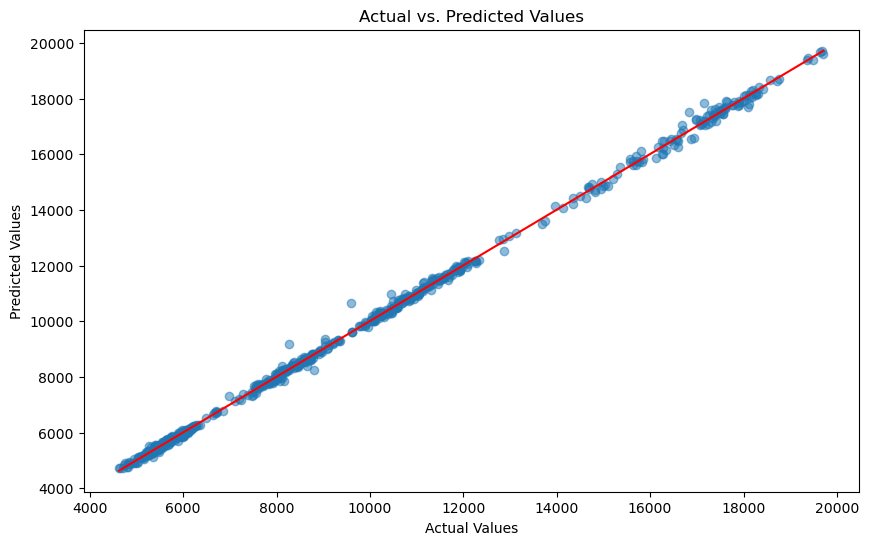

In [43]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


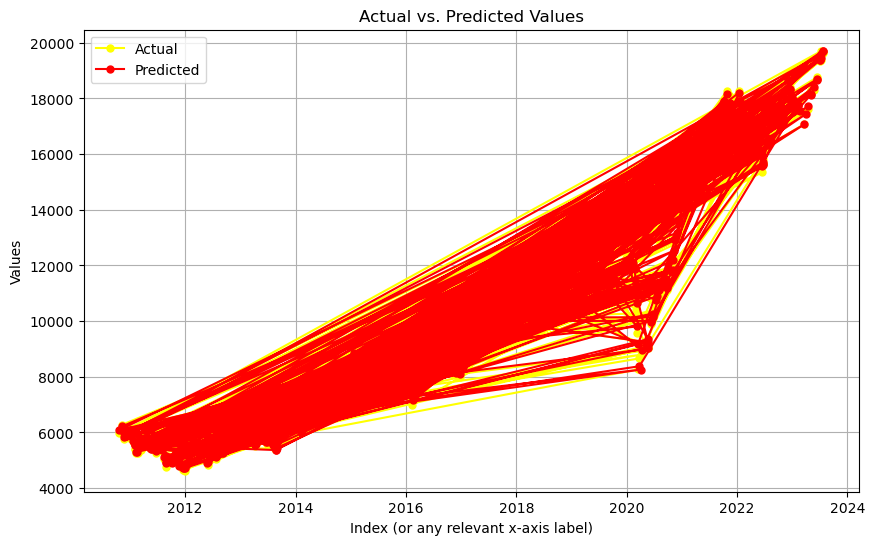

In [44]:
plt.figure(figsize=(10, 6))

# Plot the actual values in blue
plt.plot(y_test.index, y_test, label='Actual', color='yellow', marker='o', markersize=5)

# Plot the predicted values in red
plt.plot(y_test.index, y_pred, label='Predicted', color='red', marker='o', markersize=5)

plt.xlabel('Index (or any relevant x-axis label)')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
model.score(X_test, y_test)

0.9990490234582982

In [80]:
model.predict([[19745.520117,19011.060117,18329.387617,18167.250527,217.716068,-31.374456,249.090525,47.576105]])


D:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([19709.33508789])